In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.svm import SVC

In [31]:
dataSet = pd.read_csv('heart.csv')
dataSet.head(10)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [32]:
dataSet.shape

(303, 14)

In [33]:
print(dataSet.columns)
for column in dataSet.columns:
    missingCol = len(dataSet[dataSet[column].isna()])
    print(column, ": ", missingCol)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')
age :  0
sex :  0
cp :  0
trtbps :  0
chol :  0
fbs :  0
restecg :  0
thalachh :  0
exng :  0
oldpeak :  0
slp :  0
caa :  0
thall :  0
output :  0


In [34]:
indicators = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
              'exng', 'oldpeak', 'slp', 'caa', 'thall']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(dataSet[indicators], dataSet['output'], test_size=0.2, random_state=0)

In [36]:
#sns.pairplot(dataSet)

In [37]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree1.fit(x_train, y_train)
tree1.feature_importances_

array([0.08345966, 0.07069618, 0.37691689, 0.01856554, 0.02360732,
       0.        , 0.02320693, 0.08716439, 0.        , 0.03929215,
       0.        , 0.1913626 , 0.08572834])

<BarContainer object of 13 artists>

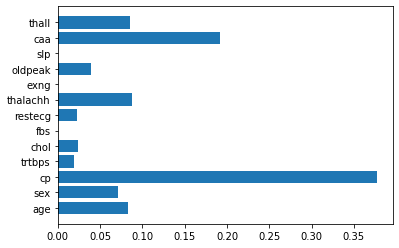

In [38]:
plt.barh(y=indicators, width=tree1.feature_importances_)

In [39]:
y_val_pred = tree1.predict(x_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

Model Accuracy: 0.8032786885245902


In [40]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              }
grid = GridSearchCV(make_pipeline(SVC(kernel='rbf', gamma=0.1)),
                    param_grid,
                    cv=kfold,
                    refit=True)

grid.fit(x_train, y_train)
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

In [41]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

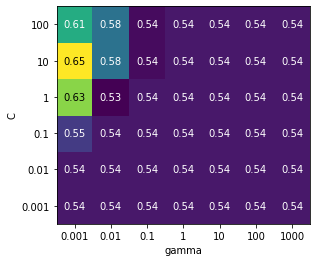

In [42]:
results = pd.DataFrame(grid.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 7)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=grid.param_grid['svc__gamma'], ylabel='C',
        yticklabels=grid.param_grid['svc__C'], cmap="viridis")
plt.show()

In [43]:
model = SVC(C=10, kernel='rbf', gamma=0.001)
model.fit(x_train, y_train)
y_val_pred = model.predict(x_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

Model Accuracy: 0.7049180327868853


In [44]:
indicators.remove('slp')
indicators.remove('fbs')
indicators.remove('exng')

In [45]:
x_train, x_test, y_train, y_test = train_test_split(dataSet[indicators], dataSet['output'], test_size=0.2, random_state=0)

In [46]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              }
grid2 = GridSearchCV(make_pipeline(SVC(kernel='rbf', gamma=0.1)),
                     param_grid,
                     cv=kfold,
                     refit=True)

grid2.fit(x_train, y_train)
grid2.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

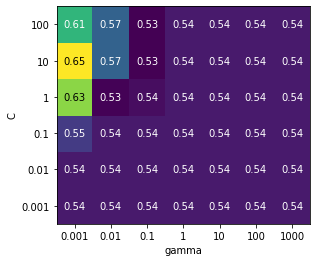

In [47]:
results = pd.DataFrame(grid2.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 7)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=grid2.param_grid['svc__gamma'], ylabel='C',
        yticklabels=grid2.param_grid['svc__C'], cmap="viridis")
plt.show()

In [48]:
model2 = SVC(C=1, kernel='rbf', gamma=0.001)
model2.fit(x_train, y_train)
y_val_pred = model2.predict(x_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

Model Accuracy: 0.6557377049180327


In [49]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
model3.fit(x_train, y_train)
y_val_pred = model3.predict(x_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

Model Accuracy: 0.8524590163934426


In [50]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)
tree.feature_importances_

array([0.1020252 , 0.07069618, 0.37691689, 0.        , 0.02360732,
       0.02320693, 0.08716439, 0.03929215, 0.1913626 , 0.08572834])

<BarContainer object of 10 artists>

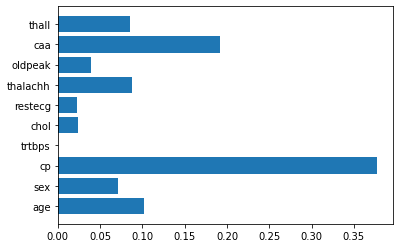

In [51]:
plt.barh(y=indicators, width=tree.feature_importances_)

In [52]:
y_val_pred = tree.predict(x_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

Model Accuracy: 0.8032786885245902


In [53]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler
from keras.callbacks import History

scaler = StandardScaler()
features = indicators
x_train = scaler.fit_transform(x_train[features].values)
y_train = pd.get_dummies(y_train).values

model = Sequential()

model.add(Dense(2))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.6435 - accuracy: 0.6240
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.6529
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5993 - accuracy: 0.6860
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5808 - accuracy: 0.6942
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5645 - accuracy: 0.7025
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.7149
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5359 - accuracy: 0.7314
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7438
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7769
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5030 - accuracy: 0.7769
Epoch 11/100
8/8 [===========

In [54]:
x_test = scaler.fit_transform(x_test[features].values)
pred_x = model.predict(x_test)
y_val_pred = np.argmax(pred_x, axis=1)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

2/2 [==============================] - 0s 4ms/step
Model Accuracy: 0.8688524590163934


In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


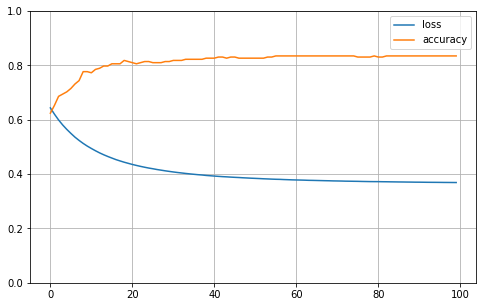

In [56]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [57]:
history2 = History()
model2 = Sequential()

model2.add(Dense(100))
model2.add(Dense(100))
model2.add(Dense(100))
model2.add(Dense(100))
model2.add(Dense(2))
model2.add(Activation("softmax"))
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.5741 - accuracy: 0.6983
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4491 - accuracy: 0.7893
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4133 - accuracy: 0.8099
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3961 - accuracy: 0.8140
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.8306
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3817 - accuracy: 0.8306
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3765 - accuracy: 0.8306
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3758 - accuracy: 0.8306
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3737 - accuracy: 0.8388
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.8347
Epoch 11/100
8/8 [===========

In [58]:
pred_x = model2.predict(x_test)
y_val_pred = np.argmax(pred_x, axis=1)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

2/2 [==============================] - 0s 6ms/step
Model Accuracy: 0.8688524590163934


In [59]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1100      
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 2)                 202       
                                                                 
 activation_2 (Activation)   (None, 2)                 0         
                                                                 
Total params: 31,602
Trainable params: 31,602
Non-trai

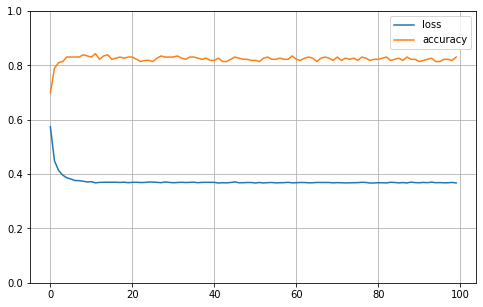

In [60]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
from tensorflow import keras

model3 = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

model3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
25/25 [==============================] - 1s 3ms/step - loss: 0.5099 - accuracy: 0.7645
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3717 - accuracy: 0.8264
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3420 - accuracy: 0.8471
Epoch 4/200
25/25 [==============================] - 0s 5ms/step - loss: 0.3237 - accuracy: 0.8678
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2880 - accuracy: 0.8884
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2667 - accuracy: 0.8926
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2546 - accuracy: 0.8926
Epoch 8/200
25/25 [==============================] - 0s 5ms/step - loss: 0.2299 - accuracy: 0.9132
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9091
Epoch 10/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1985 - accuracy: 0.9298
Epoch 11/

In [70]:
pred_x = model3.predict(x_test)
y_val_pred = np.argmax(pred_x, axis=1)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

2/2 [==============================] - 0s 9ms/step
Model Accuracy: 0.8360655737704918


In [71]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 300)               3300      
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 2)                 202       
                                                                 
Total params: 33,602
Trainable params: 33,602
Non-trainable params: 0
_________________________________________________________________


In [72]:
from tensorflow import keras

model4 = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

model4.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history4 = model4.fit(x_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
25/25 [==============================] - 1s 4ms/step - loss: 0.5180 - accuracy: 0.7562
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.8264
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3377 - accuracy: 0.8223
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2785 - accuracy: 0.8926
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.8967
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2074 - accuracy: 0.8967
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.9215
Epoch 8/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1843 - accuracy: 0.9132
Epoch 9/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1293 - accuracy: 0.9587
Epoch 10/200
25/25 [==============================] - 0s 4ms/step - loss: 0.0913 - accuracy: 0.9752
Epoch 11/

In [73]:
pred_x = model4.predict(x_test)
y_val_pred = np.argmax(pred_x, axis=1)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

2/2 [==============================] - 0s 3ms/step
Model Accuracy: 0.8524590163934426


In [74]:
model5 = Sequential()

model5.add(Dense(10, input_shape = (x_train.shape[1],)))
model5.add(Activation('relu'))
model5.add(Dense(50, input_shape = (x_train.shape[1],)))
model5.add(Activation('relu'))
model5.add(Dense(100, input_shape = (x_train.shape[1],)))
model5.add(Activation('relu'))
model5.add(Dense(100, input_shape = (x_train.shape[1],)))
model5.add(Activation('relu'))
model5.add(Dense(2))
model5.add(Activation("softmax"))
model5.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history5= model5.fit(x_train, y_train, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.6721 - accuracy: 0.5868
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.7727
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5250 - accuracy: 0.7769
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4904 - accuracy: 0.7934
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4546 - accuracy: 0.8140
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4263 - accuracy: 0.8306
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4056 - accuracy: 0.8388
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3868 - accuracy: 0.8554
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3723 - accuracy: 0.8636
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3525 - accuracy: 0.8719
Epoch 11/100
8/8 [===========

In [75]:
pred_x = model5.predict(x_test)
y_val_pred = np.argmax(pred_x, axis=1)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

2/2 [==============================] - 0s 4ms/step
Model Accuracy: 0.7868852459016393


In [76]:
model6 = Sequential()

model6.add(Dense(10, input_shape = (x_train.shape[1],)))
model6.add(Activation('sigmoid'))
model6.add(Dense(50, input_shape = (x_train.shape[1],)))
model6.add(Activation('sigmoid'))
model6.add(Dense(100, input_shape = (x_train.shape[1],)))
model6.add(Activation('sigmoid'))
model6.add(Dense(100, input_shape = (x_train.shape[1],)))
model6.add(Activation('sigmoid'))
model6.add(Dense(2))
model6.add(Activation("softmax"))
model6.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history6= model6.fit(x_train, y_train, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.7017 - accuracy: 0.5083
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5413
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.5413
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6965 - accuracy: 0.4587
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5413
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5413
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.4752
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5413
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5413
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.4669
Epoch 11/100
8/8 [===========

In [77]:
pred_x = model6.predict(x_test)
y_val_pred = np.argmax(pred_x, axis=1)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_val_pred))

2/2 [==============================] - 0s 4ms/step
Model Accuracy: 0.8688524590163934


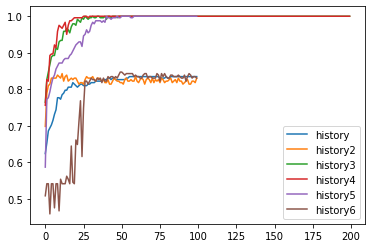

In [78]:
plt.plot(history.history['accuracy'], label="history")
plt.plot(history2.history['accuracy'], label="history2")
plt.plot(history3.history['accuracy'], label="history3")
plt.plot(history4.history['accuracy'], label="history4")
plt.plot(history5.history['accuracy'], label="history5")
plt.plot(history6.history['accuracy'], label="history6")
plt.legend()

plt.show()